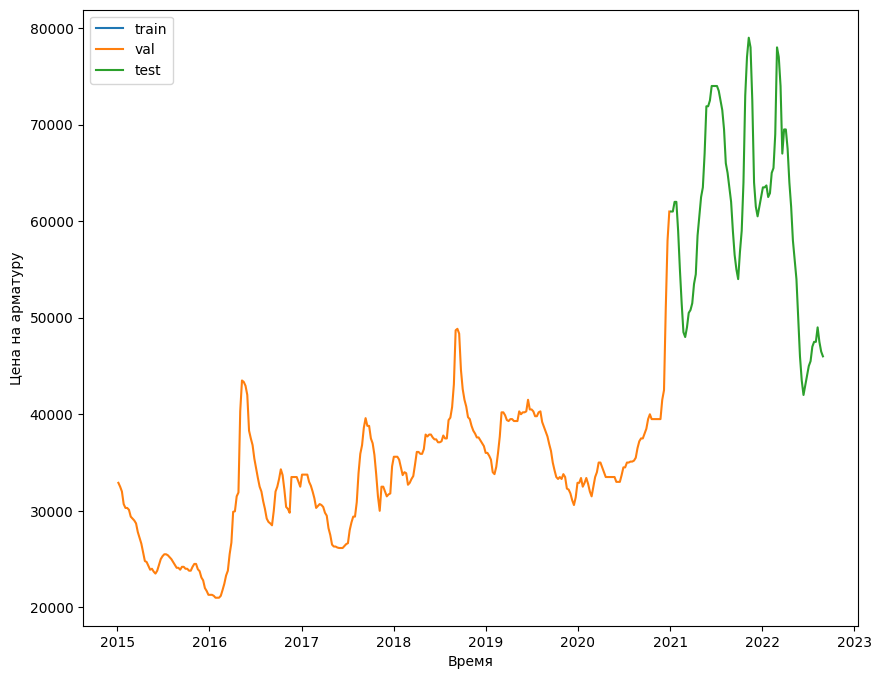

In [30]:
# Импортирование нужных библиотек
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

# from skforecast.ForecasterAutoreg import ForecasterAutoreg
# from skforecast.model_selection import backtesting_forecaster
# from skforecast.model_selection import grid_search_forecaster

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error   # Загрузка и обработка данных   
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler 

# from catboost import CatBoostRegressor

###############################################################################################

# данные представляют из себя даты и переменную, колонки - dt и pfr

path = ('data/train.csv')

df = pd.read_csv(path) # Загружаем
df.dt = pd.to_datetime(df.dt) # Приводим дату в тип pandas
df = df.set_index('dt').pfr # Делаем колонку даты индексом, даем ей периодичность месяц ('MS' - month start)

###############################################################################################

# Задаем обучающие данные
# Обычно предсказание нужно с определенного момента, которое уточняется с заказчиком
# Тут используем обычную hold-out валидацию 

val_start = pd.to_datetime('2005-01-05')
test_start = pd.to_datetime('2021-01-01')
train = df[df.index < val_start]
val = df[(df.index >= val_start) & (df.index < test_start)]
test = df[(df.index >= test_start)]

###############################################################################################

# Отрисуем данные

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(train, label='train')
ax.plot(val, label='val')
ax.plot(test, label='test')
ax.set_xlabel('Время')
ax.set_ylabel('Цена на арматуру')
plt.legend()
plt.show()